## Covid 19 Global 2020

COVID-19, which stands for "coronavirus disease 2019," is caused by the SARS-CoV-2 virus. It is a respiratory illness that was first identified in Wuhan, China, in December 2019. The World Health Organization (WHO) declared it a global pandemic in March 2020.

The symptoms of COVID-19 can range from mild to severe and may include fever, cough, shortness of breath, fatigue, body aches, loss of taste or smell, sore throat, and difficulty breathing. In severe cases, it can lead to pneumonia, acute respiratory distress syndrome (ARDS), organ failure, and death, particularly in older adults and those with underlying health conditions.

COVID-19 primarily spreads through respiratory droplets when an infected person coughs, sneezes, or talks. It can also spread by touching surfaces contaminated with the virus and then touching the face.

# About dataset
This dataset is data on confirmed cases and data on fatal cases. This data starts from 2020-01-23 to 2020-06-10

Columns description:
- Id: This column appears to be a unique identifier for each row in the dataset. Each row likely represents a specific record or observation.
- County: This column contains information about the county associated with the data. However, in the provided snippet, it seems that the data for this column is missing (NaN, which stands for "Not a Number").
- Province_State: This column indicates the province or state associated with the data. Similar to the "County" column, it also appears to be missing in the snippet.
- Country_Region: This column represents the country or region associated with the data. In the provided example, it is "Afghanistan."
- Population: This column contains the population of the specified country or region.
- Weight: This column appears to be a weight associated with the data. It might be used in calculations or analyses. The values seem to be decimal numbers between 0 and 1.
- Date: This column indicates the date of the observation.
- Target: This column specifies the target variable for the data. In the provided example, it could take on values like "ConfirmedCases" or "Fatalities," indicating whether the data relates to confirmed cases of COVID-19 or fatalities.
- TargetValue: This column appears to contain numerical values associated with the target variable. In the provided example, it is set to 0, suggesting that on the specified date, there were no new confirmed cases or fatalities.

# Import libraries

In [1]:
import numpy as np 
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os

In [2]:
train=pd.read_csv('train.csv',sep=';')

In [3]:
df=train

# Data Exploration

In [4]:
#overview of the dataset
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.05835873743558676,23/01/2020,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.5835873743558676,23/01/2020,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.05835873743558676,24/01/2020,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.5835873743558676,24/01/2020,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.05835873743558676,25/01/2020,ConfirmedCases,0
...,...,...,...,...,...,...,...,...,...
969635,969636,NaN,NaN,Zimbabwe,14240168,0.6071063990125888,08/06/2020,Fatalities,0
969636,969637,NaN,NaN,Zimbabwe,14240168,0.06071063990125888,09/06/2020,ConfirmedCases,27
969637,969638,NaN,NaN,Zimbabwe,14240168,0.6071063990125888,09/06/2020,Fatalities,0
969638,969639,NaN,NaN,Zimbabwe,14240168,0.06071063990125888,10/06/2020,ConfirmedCases,6


In [5]:
train.Date=pd.to_datetime(train.Date, format='%d/%m/%Y')  #convert to pd.to_datetime
print('Start  ',train.Date.min())
print('End ',train.Date.max())

Start   2020-01-23 00:00:00
End  2020-06-10 00:00:00


This data starts from January, 23rd 2020 to June, 10th 2020

In [6]:
# check type of data
print(train.dtypes)

Id                         int64
County                    object
Province_State            object
Country_Region            object
Population                 int64
Weight                    object
Date              datetime64[ns]
Target                    object
TargetValue                int64
dtype: object


In [7]:
print(train.shape) #checking for shape of data

(969640, 9)


Data Preparation for visualize


In [8]:
# checking duplicated data  

print('Train duplicated data = ',train.duplicated().sum())

Train duplicated data =  0


In [9]:
#checking missing value 

missing_data = train.isnull().sum(axis=0).reset_index()  
missing_data.columns=['variable','missing values']
missing_data['filling factor %']=(train.shape[0]-missing_data['missing values'])/train.shape[0]*100
missing_data.sort_values('filling factor %').reset_index(drop = True)

,variable,missing values,filling factor %
0,County,89600,90.759457
1,Province_State,52360,94.600058
2,Id,0,100.000000
3,Country_Region,0,100.000000
4,Population,0,100.000000
5,Weight,0,100.000000
6,Date,0,100.000000
7,Target,0,100.000000
8,TargetValue,0,100.000000


In [10]:
train=train.fillna('')  #fill missing value for county and province_state


In [11]:
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,,,Afghanistan,27657145,0.05835873743558676,2020-01-23,ConfirmedCases,0
1,2,,,Afghanistan,27657145,0.5835873743558676,2020-01-23,Fatalities,0
2,3,,,Afghanistan,27657145,0.05835873743558676,2020-01-24,ConfirmedCases,0
3,4,,,Afghanistan,27657145,0.5835873743558676,2020-01-24,Fatalities,0
4,5,,,Afghanistan,27657145,0.05835873743558676,2020-01-25,ConfirmedCases,0
...,...,...,...,...,...,...,...,...,...
969635,969636,,,Zimbabwe,14240168,0.6071063990125888,2020-06-08,Fatalities,0
969636,969637,,,Zimbabwe,14240168,0.06071063990125888,2020-06-09,ConfirmedCases,27
969637,969638,,,Zimbabwe,14240168,0.6071063990125888,2020-06-09,Fatalities,0
969638,969639,,,Zimbabwe,14240168,0.06071063990125888,2020-06-10,ConfirmedCases,6


In [12]:
#separate target column into confirmed cases and fatalities.

cases = train[train.Target == 'ConfirmedCases']
train = train[train.Target == 'Fatalities']
cases.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)
train['ConfirmedCases'] = cases.TargetValue
train.rename(columns={'TargetValue': 'Fatalities'}, inplace=True)

del train['Target']

In [13]:
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases
0,2,,,Afghanistan,27657145,0.5835873743558676,2020-01-23,0,0
1,4,,,Afghanistan,27657145,0.5835873743558676,2020-01-24,0,0
2,6,,,Afghanistan,27657145,0.5835873743558676,2020-01-25,0,0
3,8,,,Afghanistan,27657145,0.5835873743558676,2020-01-26,0,0
4,10,,,Afghanistan,27657145,0.5835873743558676,2020-01-27,0,0
...,...,...,...,...,...,...,...,...,...
484815,969632,,,Zimbabwe,14240168,0.6071063990125888,2020-06-06,0,14
484816,969634,,,Zimbabwe,14240168,0.6071063990125888,2020-06-07,0,3
484817,969636,,,Zimbabwe,14240168,0.6071063990125888,2020-06-08,0,5
484818,969638,,,Zimbabwe,14240168,0.6071063990125888,2020-06-09,0,27


In [14]:
train['Week'] = train.Date.dt.week #Making a new column, week

In [15]:
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,Week
0,2,,,Afghanistan,27657145,0.5835873743558676,2020-01-23,0,0,4
1,4,,,Afghanistan,27657145,0.5835873743558676,2020-01-24,0,0,4
2,6,,,Afghanistan,27657145,0.5835873743558676,2020-01-25,0,0,4
3,8,,,Afghanistan,27657145,0.5835873743558676,2020-01-26,0,0,4
4,10,,,Afghanistan,27657145,0.5835873743558676,2020-01-27,0,0,5
...,...,...,...,...,...,...,...,...,...,...
484815,969632,,,Zimbabwe,14240168,0.6071063990125888,2020-06-06,0,14,23
484816,969634,,,Zimbabwe,14240168,0.6071063990125888,2020-06-07,0,3,23
484817,969636,,,Zimbabwe,14240168,0.6071063990125888,2020-06-08,0,5,24
484818,969638,,,Zimbabwe,14240168,0.6071063990125888,2020-06-09,0,27,24


In [16]:
#county, province_state, and country_region into one column, Place

train['Place'] = (train['Country_Region'].astype('str') + 
                " " + train['Province_State'].astype('str') + " " + train['County'].astype('str'))


In [17]:
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,Week,Place
0,2,,,Afghanistan,27657145,0.5835873743558676,2020-01-23,0,0,4,Afghanistan
1,4,,,Afghanistan,27657145,0.5835873743558676,2020-01-24,0,0,4,Afghanistan
2,6,,,Afghanistan,27657145,0.5835873743558676,2020-01-25,0,0,4,Afghanistan
3,8,,,Afghanistan,27657145,0.5835873743558676,2020-01-26,0,0,4,Afghanistan
4,10,,,Afghanistan,27657145,0.5835873743558676,2020-01-27,0,0,5,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
484815,969632,,,Zimbabwe,14240168,0.6071063990125888,2020-06-06,0,14,23,Zimbabwe
484816,969634,,,Zimbabwe,14240168,0.6071063990125888,2020-06-07,0,3,23,Zimbabwe
484817,969636,,,Zimbabwe,14240168,0.6071063990125888,2020-06-08,0,5,24,Zimbabwe
484818,969638,,,Zimbabwe,14240168,0.6071063990125888,2020-06-09,0,27,24,Zimbabwe


In [18]:
#sum data by Week

week = train.loc[:,['Week','Fatalities','ConfirmedCases']]
week = week.groupby(by=['Week']).sum()
week = week.sort_values(by='ConfirmedCases', ascending=False)
week

,Fatalities,ConfirmedCases
Week,,
23,43434,1153933
22,41054,1059570
15,72368,1031243
21,46693,1011868
17,71758,983453
16,86844,980628
18,64404,947727
19,59827,946590
20,53330,934174


The table above shows the data on Fatalities and confirmed cases for each week

In [19]:
# Making a pivot table for easier reading of the data

cases = train.pivot('Place', 'Date', 'ConfirmedCases')
fatalities = train.pivot('Place', 'Date', 'Fatalities')
cases.index += ' cases'
fatalities.index += ' fatal'
combined = pd.concat([cases, 10 * fatalities])
combined

Date,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10
Place,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,2,0,0,4,5,5,1,0,0,2,0,16,0,34,10,10,16,0,10,50,4,63,36,8,18,50,18,56,21,40,37,34,52,58,49,70,56,66,27,63,30,66,84,103,72,112,68,172,125,111,232,164,134,235,190,330,168,171,215,255,369,285,276,263,413,414,349,262,408,581,492,531,540,782,584,591,658,625,580,623,866,680,545,759,758,787,915,582,791,575,542,683
Albania cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,2,11,10,5,4,9,4,4,5,6,6,13,15,19,23,28,12,11,15,11,20,16,18,27,29,28,16,6,17,9,7,17,13,21,8,19,24,21,9,14,22,25,25,29,15,34,14,10,14,16,7,9,7,6,8,17,12,10,8,6,12,4,4,4,18,18,17,13,2,1,15,5,12,8,9,6,25,21,26,23,23,15,6,21,20,13,15,20,14,17,36,42
Algeria cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,7,0,5,0,2,1,0,0,4,2,11,11,6,6,14,13,3,49,62,29,34,38,65,42,45,57,73,132,131,139,185,80,69,103,45,104,94,95,64,89,69,87,90,108,150,116,95,89,93,99,97,120,129,126,135,132,199,158,148,141,179,174,190,159,185,187,189,165,168,176,186,189,187,192,198,182,176,165,186,190,195,193,197,194,160,140,137,133,127,119,113,107,98,104,115,104,111,117,102
Andorra cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,37,0,14,22,13,25,20,31,24,36,43,41,26,36,6,14,38,11,27,35,24,20,19,19,18,0,37,8,13,14,0,23,8,9,4,0,6,0,8,7,0,5,0,0,2,0,2,1,2,1,0,1,0,2,1,0,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,79,7,1,0,0,0,0,0,0
Angola cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,2,0,0,1,0,0,2,4,2,1,2,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,1,0,0,0,3,5,0,0,1,0,0,7,0,2,0,0,0,3,0,0,0,2,2,0,6,2,1,8,1,0,1,3,7,3,2,0,0,0,0,0,2,3,1,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [20]:
# make dataset for each week, after that make the pivot table. So we can interpret and visualize data easily

train_week4=train[train.Week==4]
train_week5=train[train.Week==5]
train_week6=train[train.Week==6]
train_week7=train[train.Week==7]
train_week8=train[train.Week==8]
train_week9=train[train.Week==9]
train_week10=train[train.Week==10]
train_week11=train[train.Week==11]
train_week12=train[train.Week==12]
train_week13=train[train.Week==13]
train_week14=train[train.Week==14]
train_week15=train[train.Week==15]
train_week16=train[train.Week==16]
train_week17=train[train.Week==17]
train_week18=train[train.Week==18]
train_week19=train[train.Week==19]
train_week20=train[train.Week==20]
train_week21=train[train.Week==21]
train_week22=train[train.Week==22]
train_week23=train[train.Week==23]
train_week24=train[train.Week==24]

cases_week4=train_week4.pivot('Place', 'Date', 'ConfirmedCases')
cases_week5=train_week5.pivot('Place', 'Date', 'ConfirmedCases')
cases_week6=train_week6.pivot('Place', 'Date', 'ConfirmedCases')
cases_week7=train_week7.pivot('Place', 'Date', 'ConfirmedCases')
cases_week8=train_week8.pivot('Place', 'Date', 'ConfirmedCases')
cases_week9=train_week9.pivot('Place', 'Date', 'ConfirmedCases')
cases_week10=train_week10.pivot('Place', 'Date', 'ConfirmedCases')
cases_week11=train_week11.pivot('Place', 'Date', 'ConfirmedCases')
cases_week12=train_week12.pivot('Place', 'Date', 'ConfirmedCases')
cases_week13=train_week13.pivot('Place', 'Date', 'ConfirmedCases')
cases_week14=train_week14.pivot('Place', 'Date', 'ConfirmedCases')
cases_week15=train_week15.pivot('Place', 'Date', 'ConfirmedCases')
cases_week16=train_week16.pivot('Place', 'Date', 'ConfirmedCases')
cases_week17=train_week17.pivot('Place', 'Date', 'ConfirmedCases')
cases_week18=train_week18.pivot('Place', 'Date', 'ConfirmedCases')
cases_week19=train_week19.pivot('Place', 'Date', 'ConfirmedCases')
cases_week20=train_week20.pivot('Place', 'Date', 'ConfirmedCases')
cases_week21=train_week21.pivot('Place', 'Date', 'ConfirmedCases')
cases_week22=train_week22.pivot('Place', 'Date', 'ConfirmedCases')
cases_week23=train_week23.pivot('Place', 'Date', 'ConfirmedCases')

fatalities_week4=train_week4.pivot('Place', 'Date', 'Fatalities')
fatalities_week5=train_week5.pivot('Place', 'Date', 'Fatalities')
fatalities_week6=train_week6.pivot('Place', 'Date', 'Fatalities')
fatalities_week7=train_week7.pivot('Place', 'Date', 'Fatalities')
fatalities_week8=train_week8.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week9=train_week9.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week10=train_week10.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week11=train_week11.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week12=train_week12.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week13=train_week13.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week14=train_week14.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week15=train_week15.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week16=train_week16.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week17=train_week17.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week18=train_week18.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week19=train_week19.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week20=train_week20.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week21=train_week21.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week22=train_week22.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week23=train_week23.pivot('Place', 'Date', 'ConfirmedCases')
fatalities_week24=train_week24.pivot('Place', 'Date', 'ConfirmedCases')


# Visualization

Text(0.5, 1.0, 'COVID19 Global Confirmed Cases and Fatalities')

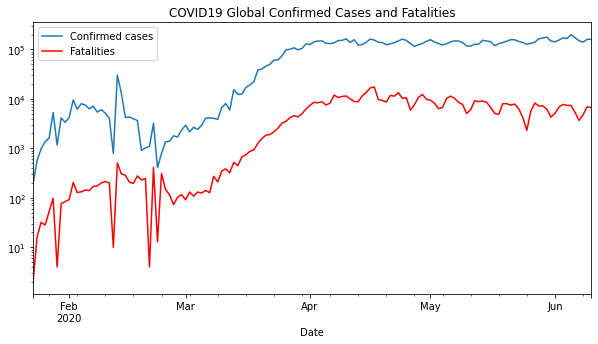

In [21]:
# show the trend data

plt.figure(figsize=(10, 5))
cases.sum().plot(label='Confirmed cases', legend=True, logy=True)
fatalities.sum().plot(label='Fatalities', legend=True, logy=True,color='red')
plt.title('COVID19 Global Confirmed Cases and Fatalities')

As can be seen from the trend above, the increasing trend in confirmed cases is comparable to the increasing trend in deaths. This increasing trend can be seen from March to April. Meanwhile, in the following months, both cases appeared to stagnate

<AxesSubplot:xlabel='Date'>

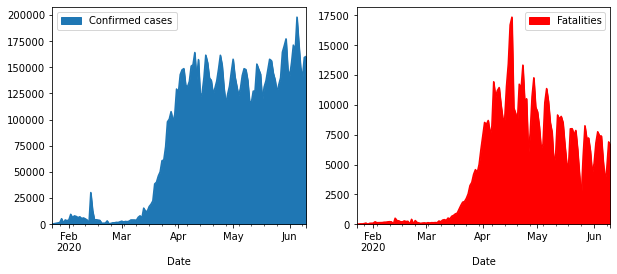

In [22]:
# show amount cases

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
cases.sum().plot.area(label='Confirmed cases', legend=True, logy=False,ax=ax[0])
fatalities.sum().plot.area(label='Fatalities', legend=True, logy=False,color='red')

As can be seen from the graph above, an increase in the number of confirmed cases and deaths occurred from March to June. For the fatalities graph, between April and May, we can see the peak of cases

<AxesSubplot:ylabel='Date'>

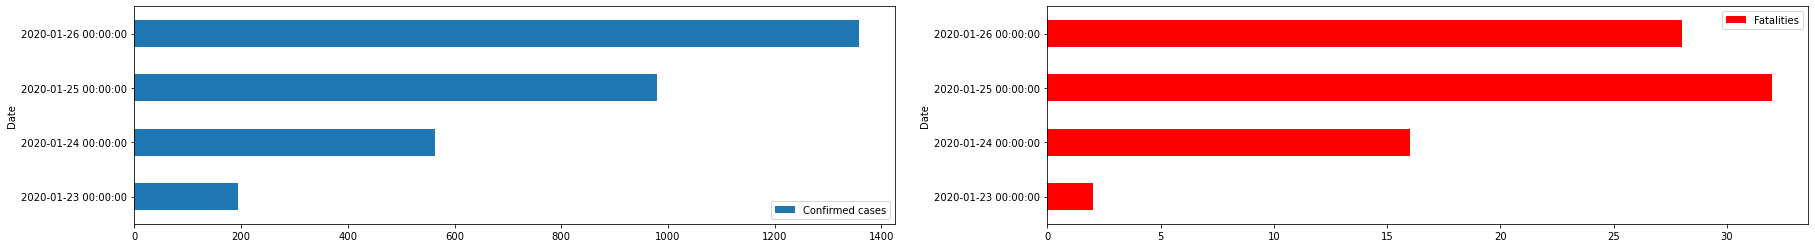

In [23]:
# show amount cases for a week
# we can change the week parameter, what ever we want

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,4))
cases_week4.sum().plot.barh(label='Confirmed cases',legend=True,ax=ax[0]) # For week 4
fatalities_week4.sum().plot.barh(label='Fatalities', legend=True,color='red',ax=ax[1])


<AxesSubplot:ylabel='Date'>

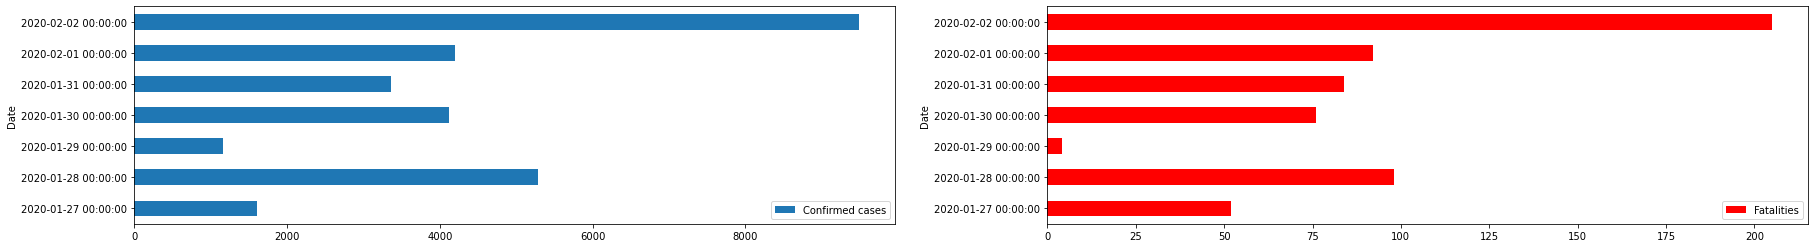

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,4))
cases_week5.sum().plot.barh(label='Confirmed cases',legend=True,ax=ax[0])
fatalities_week5.sum().plot.barh(label='Fatalities', legend=True,color='red')

In [25]:
#show top 10 confirm cases by the place

data_cases_fatalities=train[['Country_Region', 'Place','ConfirmedCases','Fatalities']]
data_cases_fatalities_merge=data_cases_fatalities.groupby('Place').sum().reset_index()
data_cases_fatalities_merge.sort_values(by='ConfirmedCases',ascending=False).head(10)

,Place,ConfirmedCases,Fatalities
242,US,2000282,112919
31,Brazil,772416,39680
208,Russia,493023,6350
2105,US New York,380156,30542
3443,United Kingdom,290143,41128
144,India,276583,7745
226,Spain,242280,27136
150,Italy,235763,34114
202,Peru,208823,5903
2136,US New York New York,208118,21960


As seen in the table above, the US is in first place for confirmed Covid cases from January to June 2020

In [26]:
#show top 10 fatalities by the place

data_cases_fatalities_merge.sort_values(by='Fatalities',ascending=False).head(10)

,Place,ConfirmedCases,Fatalities
242,US,2000282,112919
3443,United Kingdom,290143,41128
31,Brazil,772416,39680
150,Italy,235763,34114
2105,US New York,380156,30542
117,France,187996,29260
226,Spain,242280,27136
2136,US New York New York,208118,21960
177,Mexico,129184,15357
2049,US New Jersey,165346,12377


Same as confirmed cases, US is the country with the highest number of fatalities caused by COVID from Jan to June 2020